### Importing Necessary Modules

In [4]:
import numpy as np
import warnings
import pandas as pd
import tkinter as tk
import time
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

cols = ['userId','item_id','rating','timestamp']  # u.data dataset column names
df = pd.read_csv('u.data',sep='\t',names=cols)   # reading u.data file

movie_cols = ['item_id' , 'movie title' , 'release date', 'video release date',
             ' IMDb URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , 'Documentary' , 'Drama' , 'Fantasy',
              'Film-Noir' ,'Horror' , 'Musical' ,'Mystery' , 'Romance' , 'Sci-Fi',
              'Thriller', 'War' , 'Western']   # u.item dataset column names
movie_titles = pd.read_csv('u.item',sep='|',encoding='latin-1',names=movie_cols) # reading u.item file


### User Table

In [5]:
df

,userId,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


### Movie Details Table

In [6]:
movie_titles

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
movie_titles = movie_titles[['item_id','movie title']]
movie_titles

,item_id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


### Merging "Movie Table" and "User Table"

In [8]:
data= pd.merge(df,movie_titles,on= 'item_id')
data.head(10)

,userId,item_id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
5,296,242,4,884196057,Kolya (1996)
6,34,242,5,888601628,Kolya (1996)
7,271,242,4,885844495,Kolya (1996)
8,201,242,4,884110598,Kolya (1996)
9,209,242,4,883589606,Kolya (1996)


In [9]:
df.shape

(100000, 4)

In [10]:
movie_titles.shape

(1682, 2)

In [11]:
df.describe()

,userId,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


### Checking for null values in User Table

In [12]:
df.isnull().sum()

userId       0
item_id      0
rating       0
timestamp    0
dtype: int64

In [13]:
movie_titles.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


### Checking for null values in Movie Table

In [14]:
movie_titles.isnull().sum()

item_id        0
movie title    0
dtype: int64

### Creating movie wise mean rating table and Adding freq of each movie 

In [15]:
rating= pd.DataFrame(data.groupby(by='movie title')['rating'].mean().sort_values(ascending=False))
rating['Count'] = data['movie title'].value_counts()
rating.sort_values(by='Count',ascending=False)

,rating,Count
movie title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
B. Monkey (1998),3.000000,1
Sleepover (1995),3.000000,1
"Silence of the Palace, The (Saimt el Qusur) (1994)",3.000000,1


### Histogram of frequency of Count

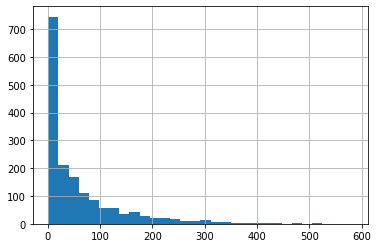

In [16]:
rating['Count'].hist(bins=30)

In [17]:
rating

,rating,Count
movie title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1
...,...,...
Touki Bouki (Journey of the Hyena) (1973),1.0,1
JLG/JLG - autoportrait de décembre (1994),1.0,1
Daens (1992),1.0,1


### Scatter plot between rating and Count column

Text(0, 0.5, 'Count -->')

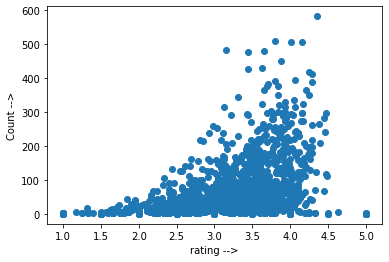

In [18]:
plt.scatter(rating['rating'],rating['Count'])
plt.xlabel('rating -->')
plt.ylabel('Count -->',rotation='vertical')

### Creating Pivot table between userId and movie title

In [19]:
pivot_df = data.pivot_table(index='userId',columns='movie title',values='rating')
pivot_df

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
rating

,rating,Count
movie title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1
...,...,...
Touki Bouki (Journey of the Hyena) (1973),1.0,1
JLG/JLG - autoportrait de décembre (1994),1.0,1
Daens (1992),1.0,1


### GUI of Movie Recommender using Tkinter

In [ ]:
app= tk.Tk()
app.title('Recommender System')
app.geometry('320x200')


tk.Label(app,text="Watched Movie's : ").place(x=25,y=25)
tk.Label(app,text="Recommendations : ").place(x=25,y=120)
tk.Label(app,text="Also watch out : ").place(x=25,y=145)
movie_var = tk.Variable(app)
tk.Entry(app,textvariable= movie_var,width=26).place(x=130,y=25)

recomm_var = tk.Variable(app)

tk.Label(app,textvariable=recomm_var).place(x=140,y=120)
also_try_var = tk.Variable(app)

tk.Label(app,textvariable=also_try_var).place(x=140,y=145)

def find_recomm():
        movie = movie_var.get().lower().rstrip()
        if movie:
            try:
                movie = movie_titles['movie title'][movie_titles['movie title'].apply(lambda x: movie in x.lower())].values[0]
                movie_var.set(movie)
            except IndexError:
                movie_var.set('Movie not found')
                recomm_var.set('No recommendation')
                also_try_var.set('No recommendation')
            except KeyError:
                recomm_var.set('No relevant movie')
                also_try_var.set('No relevant movie')
            else:
                corr_df = pd.DataFrame(pivot_df.corrwith(pivot_df[movie]), columns=['Correlation'])
                corr_df.dropna(inplace=True)
                corr_df = corr_df.join(rating['Count'])
                corr_df['mul_corr_count'] = corr_df['Correlation'] * corr_df['Count']
                recomm_var.set(corr_df[corr_df['Count']>200].sort_values(by='Correlation',ascending=False).index[1])
                also_try_var.set(corr_df[corr_df['Count']>200].sort_values(by='Correlation',ascending=False).index[2])
        else:
            movie_var.set('Please enter something')
            recomm_var.set('No recommendation')
            also_try_var.set('No recommendation')
            
tk.Button(app,text='Find Suggestions',command = find_recomm,bg='#87ede3').place(x=100,y=70)
recomm_var.set('Type your movie above..')
also_try_var.set('Type your movie above..')
app.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\DONY\Anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 2897, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 107, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 131, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1607, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1614, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Count'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DONY\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-40-c3a20088bb72>", line 35, in find_recomm
    corr_df = corr_df.join(rating['Count'])
  File "C:\Users\DONY\Anaconda3\lib\site-packages\pandas